<a href="https://colab.research.google.com/github/Afsha26/Supervised_learning_ML/blob/main/ml_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 HR Data Analysis using Python

In this notebook, we analyze an HR dataset to understand employee retention.
We'll explore factors such as **salary**, **promotions**, and other variables
to see how they affect whether employees leave the company.
Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

## 🔹 Step 1: Import Required Libraries
We start by importing essential Python libraries:
- `pandas` for data manipulation
- `matplotlib` for visualization

In [ ]:
# Import required libraries
import pandas as pd
from matplotlib import pyplot as plt

# This makes plots appear inside the notebook
%matplotlib inline

## 🔹 Step 2: Load the Dataset
*Rename dataset as HR_DATA*<br>
We load the HR dataset (`HR_DATA.xls`)and display the first few rows.

In [ ]:
# Load dataset into a DataFrame
df = pd.read_csv("HR_DATA.xls")

# Display first 5 rows
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 🔹 Step 3: Separate Employees Based on Retention
- `no_left`: Employees who stayed (left == 0)
- `yes_left`: Employees who left (left == 1)

In [ ]:
# Separate employees based on whether they left or not
no_left = df[df.left == 0]
yes_left = df[df.left == 1]

# Display first few rows of employees who stayed
no_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## 🔹 Step 4: Salary vs Employee Retention
Let's see if salary has an effect on employee turnover.

salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64


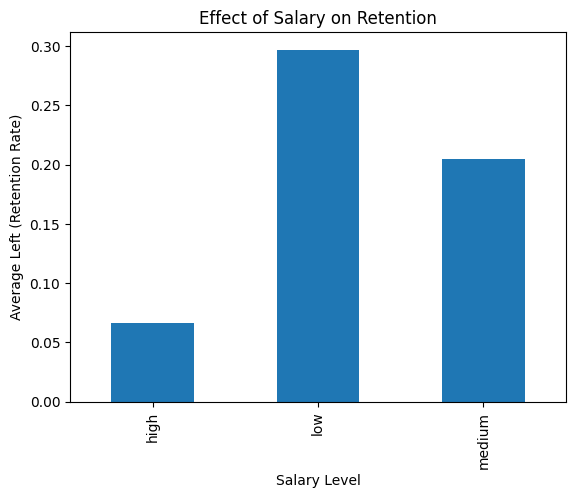

In [ ]:
# Group data by salary and calculate mean retention (left)
salary_retention = df.groupby('salary')["left"].mean()

print(salary_retention)

# Plot results
salary_retention.plot(kind="bar")
plt.title("Effect of Salary on Retention")
plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees Who Left")
plt.show()


## 🔹 Step 5: Promotion vs Employee Retention
Now we analyze how promotions in the last 5 years affect retention.


promotion_last_5years
0    0.241962
1    0.059561
Name: left, dtype: float64


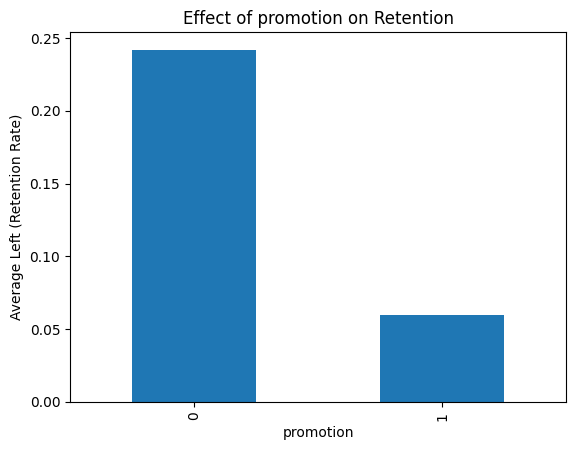

In [ ]:
# Group data by promotion status and calculate mean retention
promotion_retention = df.groupby("promotion_last_5years")["left"].mean()

print(promotion_retention)

# Plot results
promotion_retention.plot(kind="bar")
plt.title("Effect of Promotion on Retention")
plt.xlabel("Promotion in Last 5 Years (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Employees Who Left")
plt.show()


In [ ]:
subdf=df[["promotion_last_5years","salary"]]
subdf.head()

,promotion_last_5years,salary
0,0,low
1,0,medium
2,0,medium
3,0,low
4,0,low


## ✅ Conclusion
- Employees with **lower salaries** are more likely to leave.  
- Employees who **received promotions** in the last 5 years tend to stay longer.  

This analysis highlights the importance of **fair compensation** and
**career growth opportunities** in improving employee retention.



**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that.


In [ ]:
salary_dummies=pd.get_dummies(subdf.salary,prefix="salary")
salary_dummies=salary_dummies.astype(int)
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [ ]:
final_df=pd.concat([subdf,salary_dummies],axis='columns')
final_df.head()

,promotion_last_5years,salary_high,salary_low,salary_medium
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x=final_df
y=df.left
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.9)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Accuracy of the model
model.score(X_test,Y_test)

0.7686666666666667